In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from BICO.BICO import BICO
from BICO.Point import Point

In [9]:
n_samples = 1500
random_state = 170

X_varied, y_varied = make_blobs(n_samples=n_samples, centers=5,
                                cluster_std=[1.0, 3, 0.3, 2, 5],
                                random_state=random_state)

y_pred = KMeans(n_clusters=5, random_state=random_state).fit_predict(X_varied)

In [10]:
projections = 5

def run_bico(size):
    bico = BICO(2, n_samples, projections, size)
    
    for row in X_varied:
        bico.insert_point(Point(row))
        
    c = bico.get_coreset()
    plt.subplot(223)
    plt.scatter(c[:,1], c[:,2], s=c[:,0])
    plt.title("Reduced data set of size {0}".format(size))
    plt.show()
    
    # repeat rows as a workaround for weighted kmeans
    X_red = []
    for row in c:
        ar = np.tile(row[1:], (int(row[0]),1))
        X_red.append(ar)
    X_red = np.vstack(X_red)
    
    # cluster on reduced data set
    cluster = KMeans(n_clusters=5, random_state=random_state).fit(X_red)
    y_pred_red = cluster.predict(X_varied)
    
    plt.subplot(223)
    plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred_red)
    plt.title("Clustering on reduced data set")
    plt.show()
    
    plt.subplot(223)
    plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
    plt.title("Clustering on original data set")
    plt.show()

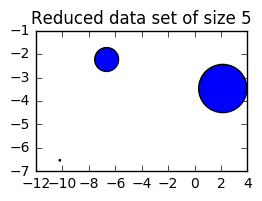

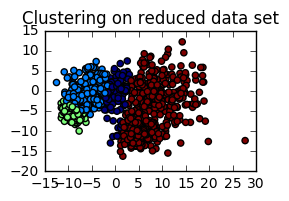

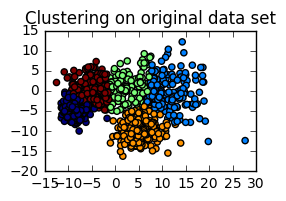

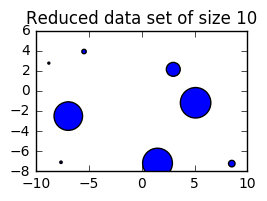

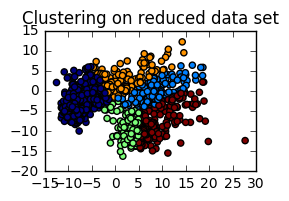

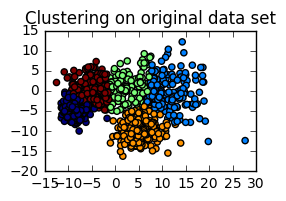

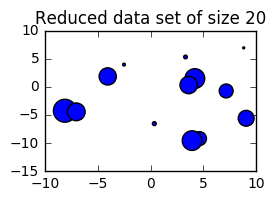

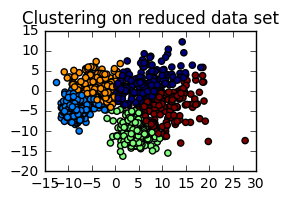

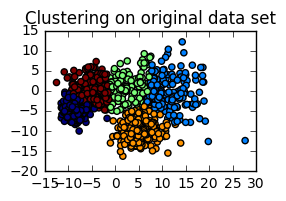

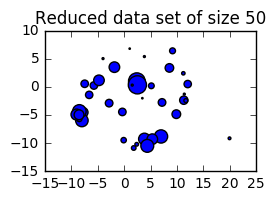

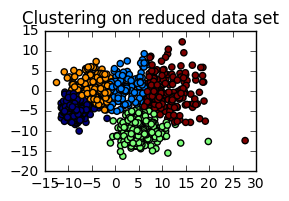

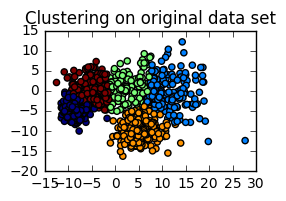

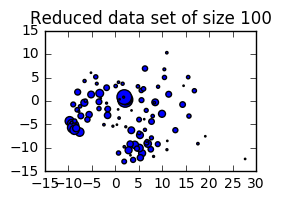

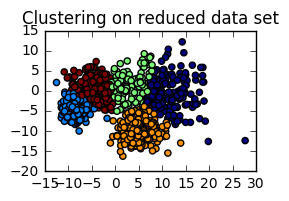

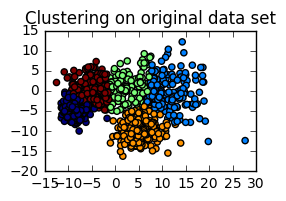

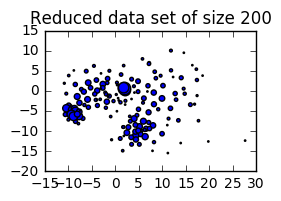

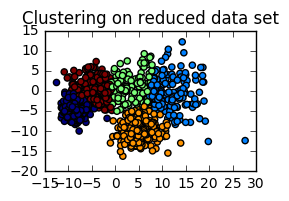

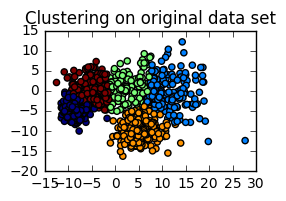

In [11]:
%matplotlib inline

for size in [5,10,20,50,100,200]:
    run_bico(size)